In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'D:\\Jigsaw\\4.Python'

In [3]:
#change working dir if data is in that location
#data_dir = 'Z\ML Course\Clustering\data'
#os.chdir(data_dir)

In [4]:
data=pd.read_csv("kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.shape

(21613, 21)

In [13]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living15']]

In [17]:
data_num.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [18]:
#Scale the data , sing pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0) # axis = 0 for all rows of the column,

In [19]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living15
0,-0.866717,-0.398737,-1.447464,-0.943355
1,-0.005688,-0.398737,0.175607,-0.432686
2,-0.980849,-1.473959,-1.447464,1.070140
3,0.174090,0.676485,1.149449,-0.914174
4,-0.081958,-0.398737,-0.149007,-0.272190


In [20]:
## Scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [21]:
print(dat_scaled)
print("Type of output is "+str(type(dat_scaled)))
print("Shape of the object is "+str(type(dat_scaled.shape)))

[[-0.86671733 -0.39873715 -1.44746357 -0.9433552 ]
 [-0.00568792 -0.39873715  0.1756067  -0.43268619]
 [-0.98084935 -1.47395936 -1.44746357  1.07013975]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.41025258]
 [-0.38158814 -0.39873715  0.50022075 -0.8412214 ]
 [-0.58588173 -1.47395936 -1.77207762 -1.41025258]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is <class 'tuple'>


In [22]:
## Create a cluster model
import sklearn.cluster as cluster

In [23]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(data_scaled)

In [24]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [25]:
np.unique(kmeans.labels_)

array([0, 1, 2])

In [26]:
kmeans.cluster_centers_ #every cluster has 4 centers, one each along its dimension

array([[-0.03770023,  0.40691935,  0.40991125,  0.19394754],
       [-0.46077398, -0.69976592, -0.82935889, -0.69374344],
       [ 1.92364976,  0.90183923,  1.38371636,  1.80545298]])

In [29]:
dat_scaled

array([[-0.86671733, -0.39873715, -1.44746357, -0.9433552 ],
       [-0.00568792, -0.39873715,  0.1756067 , -0.43268619],
       [-0.98084935, -1.47395936, -1.44746357,  1.07013975],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.41025258],
       [-0.38158814, -0.39873715,  0.50022075, -0.8412214 ],
       [-0.58588173, -1.47395936, -1.77207762, -1.41025258]])

In [38]:
#### Elbow method
from scipy.spatial.distance import cdist
K=range(1,20)
wss= []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'),axis=1))/dat_scaled.shape[0])
    
    
    #cdist calculates distances across co-ordinate axes

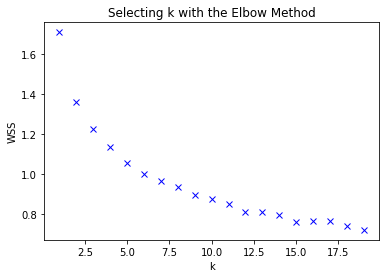

In [39]:
plt.plot(K,wss,'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [40]:
import sklearn.metrics as metrics
labels = cluster.KMeans(n_clusters=6,random_state=200).fit(dat_scaled).labels_

#depending on the initiation points the final result of kmeans can vary. Therefore

In [41]:
labels

array([2, 3, 5, ..., 5, 3, 5])

In [42]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [46]:
metrics.silhouette_score(dat_scaled,labels,metric='euclidean',sample_size=10000,random_state=200)

#The silhouette coefficient calculated using the mean intra cluster distances
#for each sample. The silhouette for sample is (b-a)/max(a,b).
# to clarify b is the distance between a sample and the nearest cluster that the 
#sample_size is the size of sample to use when computing silhouette coefficient
#If sample_size is none, no sampling is used.

0.2527461467680687

In [48]:
import sklearn.metrics as metrics
labels1 = cluster.KMeans(n_clusters=7,random_state=200).fit(dat_scaled).labels_

#depending on the initiation points the final result of kmeans can vary. Therefore

In [49]:
labels1

array([5, 1, 2, ..., 2, 1, 2])

In [50]:
np.unique(labels1)

array([0, 1, 2, 3, 4, 5, 6])

In [51]:
metrics.silhouette_score(dat_scaled,labels1,metric='euclidean',sample_size=10000,random_state=200)

0.24661917868639552

In [62]:
import sklearn.metrics as metrics
labels2 = cluster.KMeans(n_clusters=5,random_state=200).fit(dat_scaled).labels_

In [63]:
labels2

array([4, 1, 4, ..., 4, 1, 4])

In [64]:
np.unique(labels2)

array([0, 1, 2, 3, 4])

In [65]:
metrics.silhouette_score(dat_scaled,labels2,metric='euclidean',sample_size=10000,random_state=200)

0.26332697950972955

In [ ]:
for i in range(4,9):
    labels3=cluster.KMeans(n_clusters=5,random_state=200).fit(dat_scaled).labels_
    print ("Silh")
    

In [67]:
import cluster_profiles as cluster_profiles

ModuleNotFoundError: No module named 'cluster_profiles'

In [ ]:
# Lets look for profiles for 5,6,7 clusters
kmeans=cluster.KMeans(n_clusters=5,random_state=200).fit(dat_scaled)

In [ ]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)
